<center><font color = "green"><h1><b>PUBG Game Prediction</b></h1></font></center>

<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExeW0xb284eGp5Z3d1ZmNqb2c4ODdwaHU3ejd6NGRiY2RpdzBkNjhoNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9dg/gVyTCADBv2vUNOdJHn/giphy.gif"></center>

## Table of Content
1. [Importing Libraries](#import)
2. [Reading the Dataset](#read)
3. [Data Wrangling / Data Munging](#wrangling)
4. [Feature Engineering](#fe)
5. [ML - CatBoost Model](#ml)

<font color="green"><h2>Importing the Libraries</h2></font> <a class = "anchor" id="import">

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib  inline
plt.rcParams["figure.figsize"] = (16,6)

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

<font color="green"><h2>Reading the Dataset</h2></font> <a class = "anchor" id="read">

In [2]:
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
df.shape

(4446966, 29)

<font color="green"><h2>Data Wrangling / Data Munging</h2></font> <a class = "anchor" id="wrangling">

Checking for the missing values

In [6]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df.drop(2744604, inplace = True)

Understanding Player Distribution in a game

In [9]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


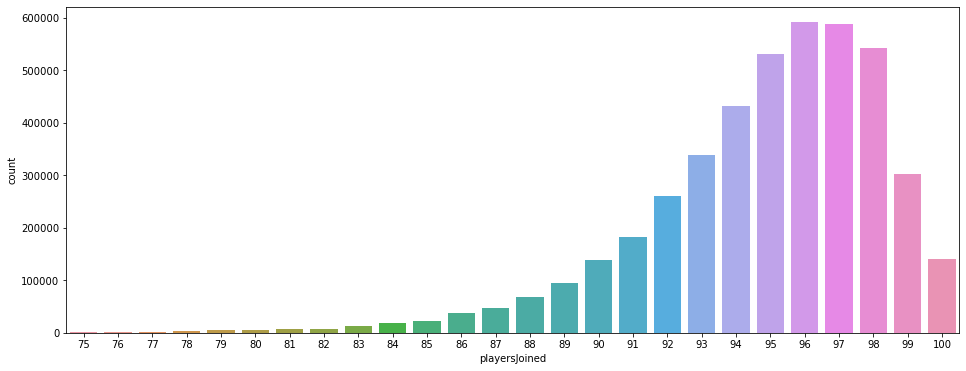

In [11]:
sns.countplot(df[df["playersJoined"]>=75]["playersJoined"])
plt.show()

### Analysing the data

Kills Without Moving😱🙀?
<center><img src = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMTAxejNxYWw2eGVxMTR6NmlxMzRoMDFxNjF0cDJicWdxODhpcHVvbSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/F7ULrqi9O4kSBqZecu/giphy.gif"></center>

preparing a data parameter to gather the information of the total distance travelled

In [12]:
df["TotalDistanceCovered"] = df["walkDistance"] + df["swimDistance"] + df["rideDistance"]

prepare a data parameter to check for anamoly detection that the person has not moved but still managed to do the kills

In [13]:
df["KillsWithoutMoving"] = ((df["kills"]>0) & (df["TotalDistanceCovered"] ==0))

In [14]:
df[df["KillsWithoutMoving"] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,TotalDistanceCovered,KillsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [15]:
df[df["KillsWithoutMoving"] == True].shape

(1535, 32)

In [16]:
# dropping the table
df.drop(df[df['KillsWithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaXNya2QwdGFsdTk2NWIzang1cjk1aWJnc25idWgzanRnNjFnamo5dyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/3o6fITQ9ITo4HTD5te/giphy.gif"></center>

In [17]:
df[df['roadKills'] > 5].shape

(46, 32)

In [18]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how 🙀😱????
<center><img src = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2FiN3V6czJmNzdncmVmb2U2YXRudDdkd2NodzllNGY1dnlsbHA3eiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/MPlI5KNpjE9s20Lkfj/giphy.gif"></center>

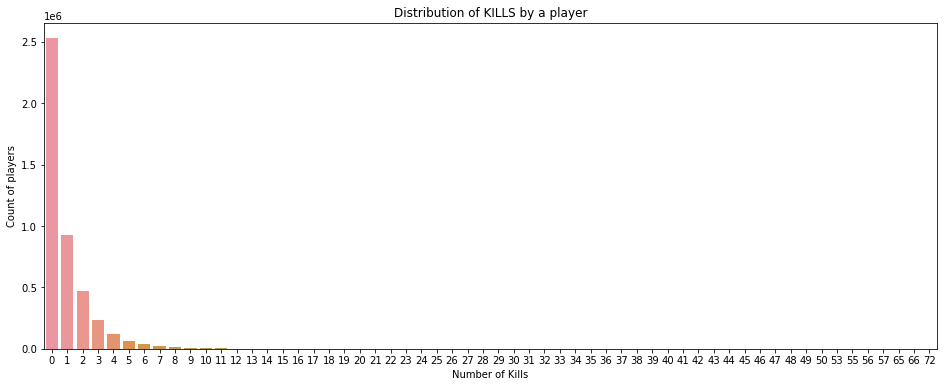

In [19]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

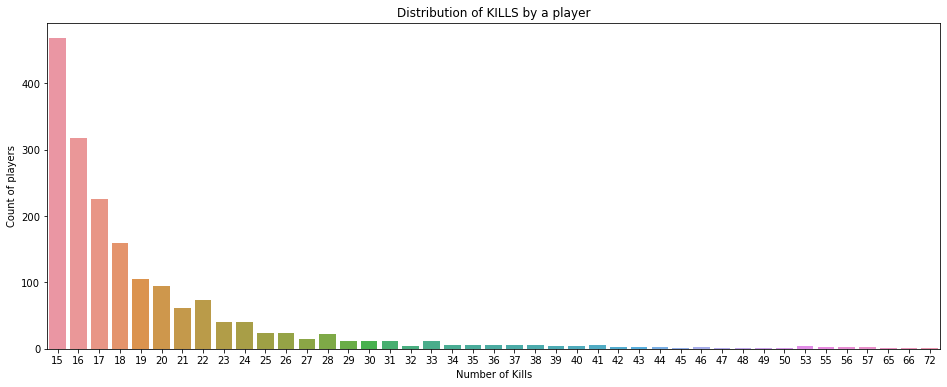

In [20]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [21]:
df[df["kills"]>20].shape

(417, 32)

In [22]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

### Head Shot

In [23]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

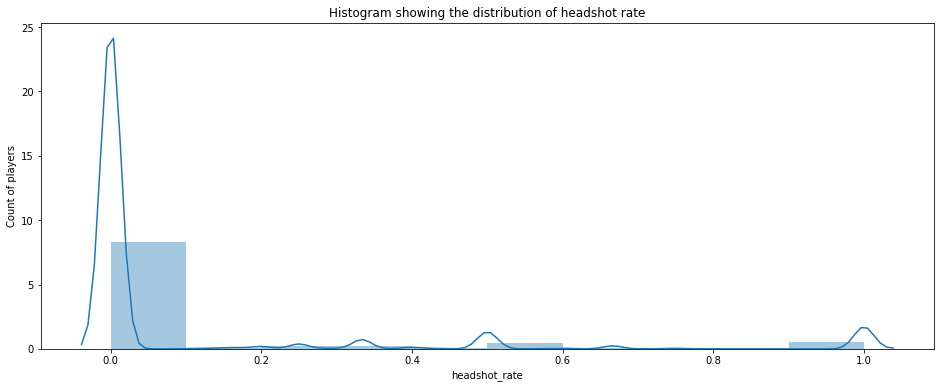

In [24]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [25]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [26]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

#### Longest Shot

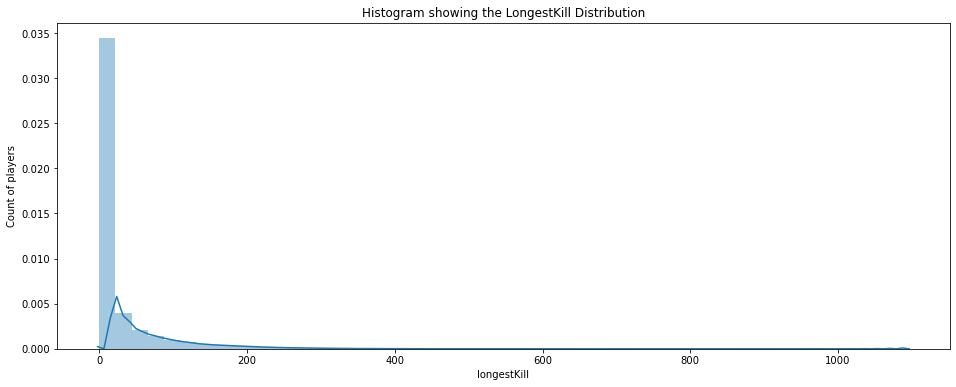

In [27]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [28]:
df[df['longestKill']>=500].shape

(1747, 33)

In [29]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

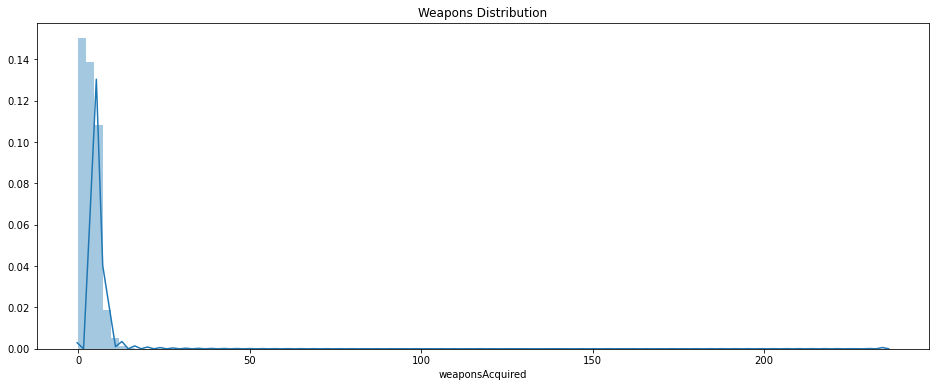

In [30]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [31]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [32]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

### EDA

In [33]:
df.shape

(4436306, 33)

In [34]:
df.isna().sum()

Id                      0
groupId                 0
matchId                 0
assists                 0
boosts                  0
damageDealt             0
DBNOs                   0
headshotKills           0
heals                   0
killPlace               0
killPoints              0
kills                   0
killStreaks             0
longestKill             0
matchDuration           0
matchType               0
maxPlace                0
numGroups               0
rankPoints              0
revives                 0
rideDistance            0
roadKills               0
swimDistance            0
teamKills               0
vehicleDestroys         0
walkDistance            0
weaponsAcquired         0
winPoints               0
winPlacePerc            0
playersJoined           0
TotalDistanceCovered    0
KillsWithoutMoving      0
headshot_rate           0
dtype: int64

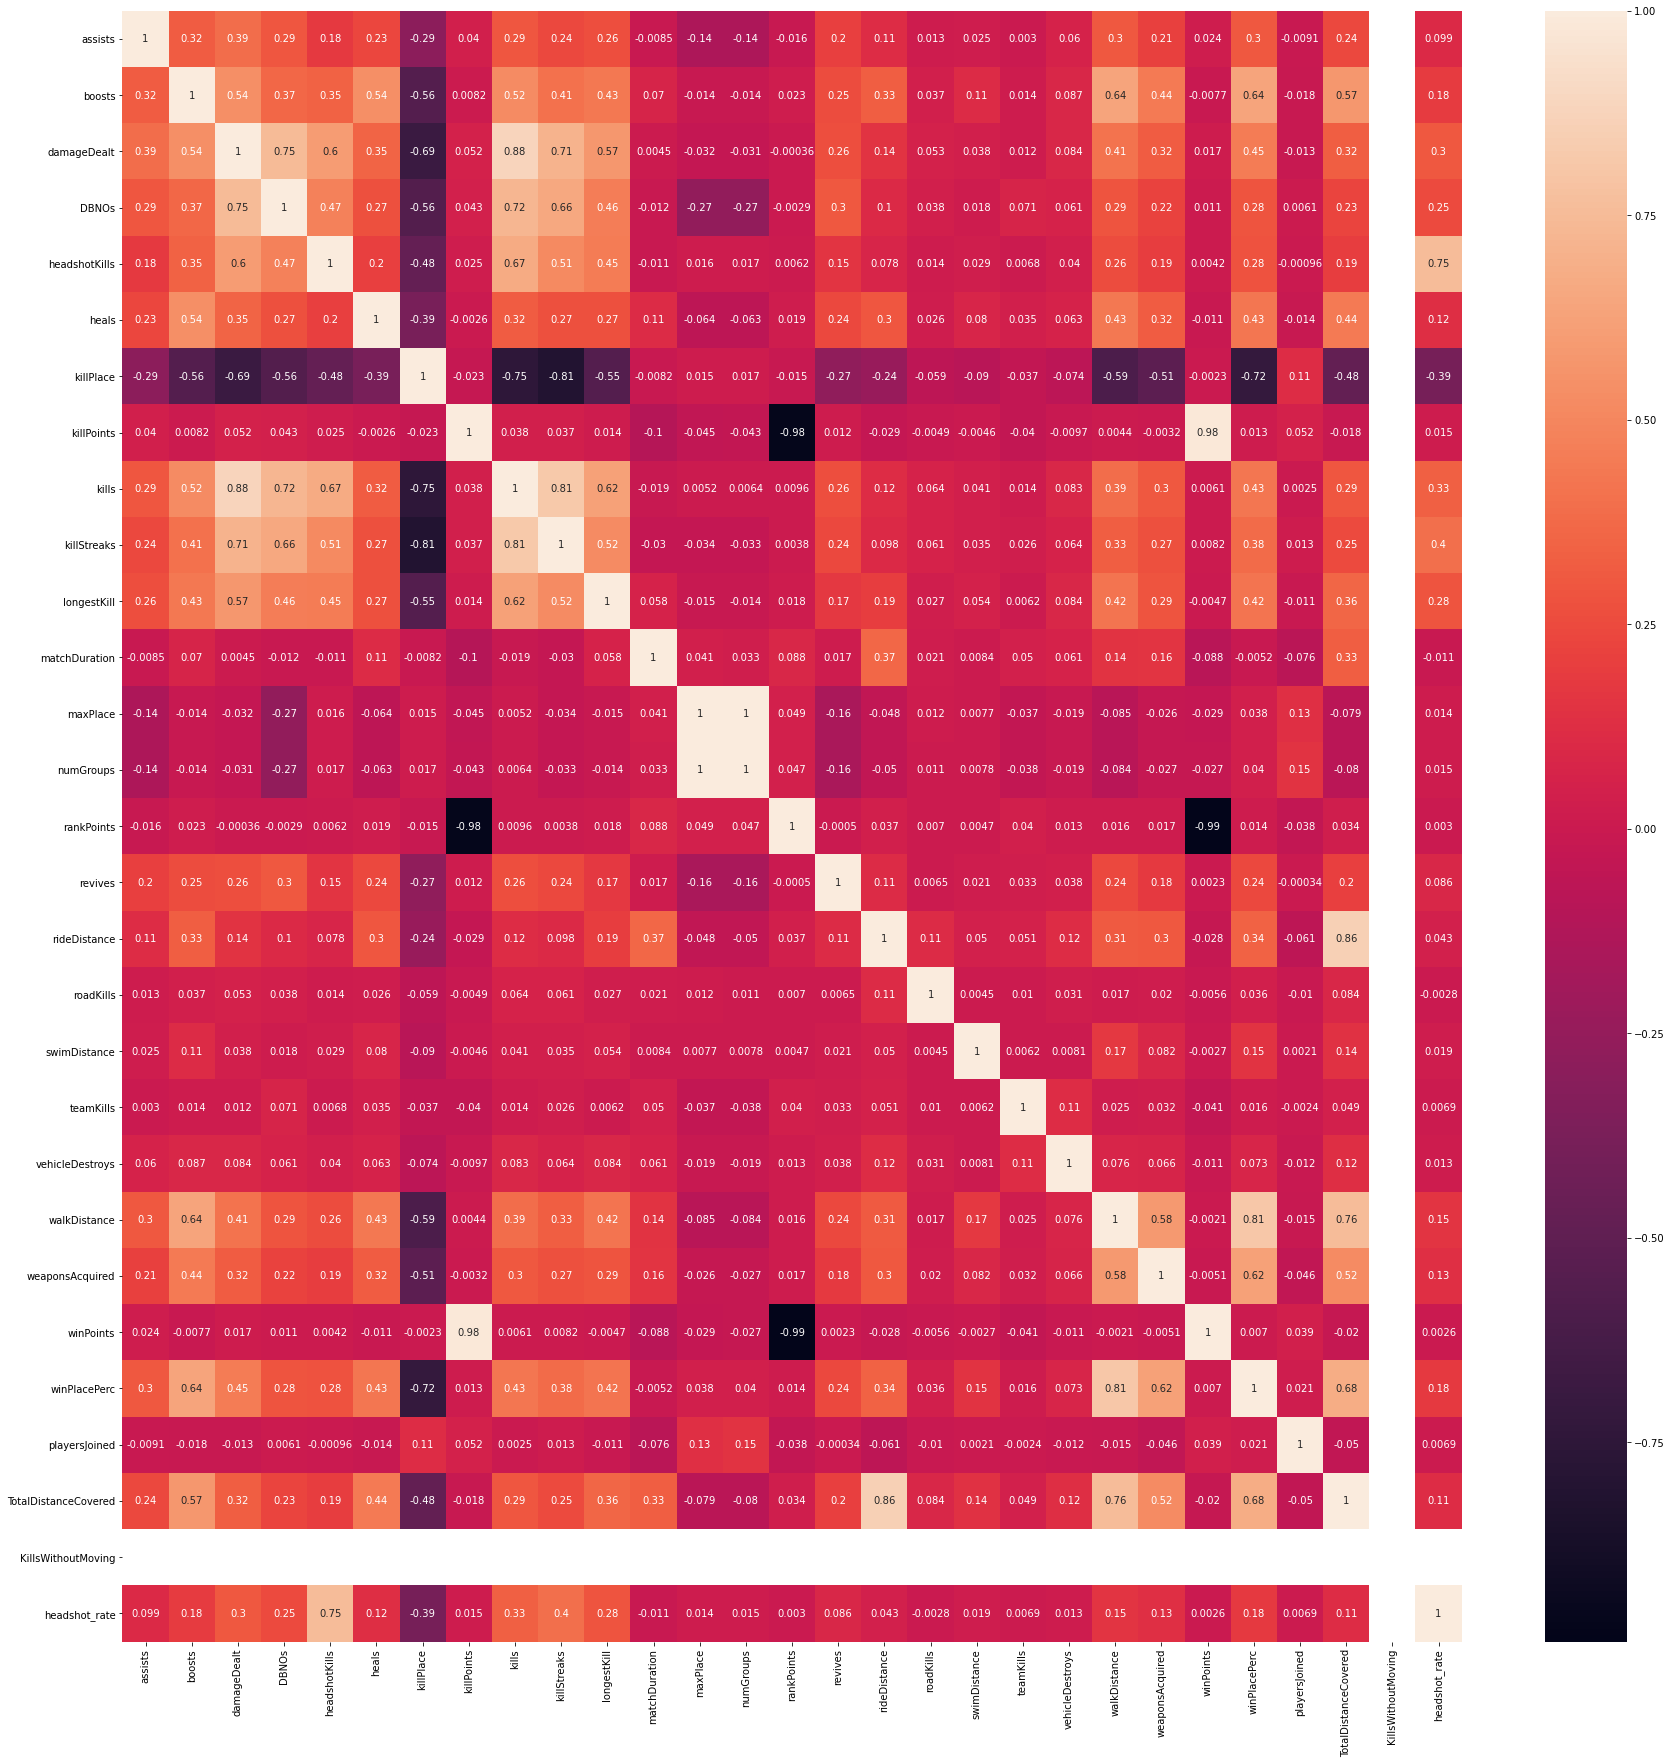

In [37]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

<font color="green"><h2>Feature Engineering</h2></font> <a class = "anchor" id="fe">

In [38]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [39]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [56]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'TotalDistanceCovered', 'KillsWithoutMoving', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [57]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration', 'TotalDistanceCovered'])

In [58]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playersJoined,KillsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


<font color="green"><h2>ML - CatBoost Model</h2></font> <a class = "anchor" id="ml">

Handling Categorical Values

In [59]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [60]:
x = pd.get_dummies(x, columns = ['matchType', 'KillsWithoutMoving'])

In [61]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,KillsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [62]:
x.shape

(4436306, 39)

In [63]:
features = x.columns

### Scaling the Data

In [64]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [65]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


### Splitting the Data

In [66]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [67]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 39) (3105414,)
(1330892, 39) (1330892,)


## CatBoost Model

In [68]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [69]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [70]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5481865	test: 0.5479742	best: 0.5479742 (0)	total: 161ms	remaining: 15.9s
1:	learn: 0.5333397	test: 0.5331385	best: 0.5331385 (1)	total: 318ms	remaining: 15.6s
2:	learn: 0.5189575	test: 0.5187636	best: 0.5187636 (2)	total: 490ms	remaining: 15.8s
3:	learn: 0.5050568	test: 0.5048699	best: 0.5048699 (3)	total: 650ms	remaining: 15.6s
4:	learn: 0.4916176	test: 0.4914397	best: 0.4914397 (4)	total: 803ms	remaining: 15.3s
5:	learn: 0.4785840	test: 0.4784116	best: 0.4784116 (5)	total: 937ms	remaining: 14.7s
6:	learn: 0.4660018	test: 0.4658362	best: 0.4658362 (6)	total: 1.07s	remaining: 14.2s
7:	learn: 0.4538409	test: 0.4536813	best: 0.4536813 (7)	total: 1.22s	remaining: 14.1s
8:	learn: 0.4420392	test: 0.4418855	best: 0.4418855 (8)	total: 1.39s	remaining: 14s
9:	learn: 0.4306034	test: 0.4304537	best: 0.4304537 (9)	total: 1.53s	remaining: 13.8s
10:	learn: 0.4196083	test: 0.4194675	best: 0.4194675 (10)	total: 1.68s	remaining: 13.6s
11:	learn: 0.4089457	test: 0.4088110	best: 0.4088110 (

94:	learn: 0.1400804	test: 0.1401823	best: 0.1401823 (94)	total: 13.6s	remaining: 717ms
95:	learn: 0.1396822	test: 0.1397844	best: 0.1397844 (95)	total: 13.7s	remaining: 573ms
96:	learn: 0.1393144	test: 0.1394178	best: 0.1394178 (96)	total: 13.9s	remaining: 429ms
97:	learn: 0.1388404	test: 0.1389497	best: 0.1389497 (97)	total: 14s	remaining: 286ms
98:	learn: 0.1384392	test: 0.1385496	best: 0.1385496 (98)	total: 14.2s	remaining: 143ms
99:	learn: 0.1380997	test: 0.1382089	best: 0.1382089 (99)	total: 14.3s	remaining: 0us

bestTest = 0.1382088882
bestIteration = 99

0:	loss: 0.1382089	best: 0.1382089 (0)	total: 16.1s	remaining: 4m 1s
0:	learn: 0.5125547	test: 0.5123600	best: 0.5123600 (0)	total: 145ms	remaining: 14.3s
1:	learn: 0.4670465	test: 0.4668788	best: 0.4668788 (1)	total: 287ms	remaining: 14.1s
2:	learn: 0.4264422	test: 0.4262960	best: 0.4262960 (2)	total: 447ms	remaining: 14.4s
3:	learn: 0.3903095	test: 0.3901714	best: 0.3901714 (3)	total: 587ms	remaining: 14.1s
4:	learn: 0.358096

88:	learn: 0.1177957	test: 0.1180034	best: 0.1180034 (88)	total: 11.9s	remaining: 1.47s
89:	learn: 0.1177058	test: 0.1179125	best: 0.1179125 (89)	total: 12s	remaining: 1.33s
90:	learn: 0.1172617	test: 0.1174749	best: 0.1174749 (90)	total: 12.2s	remaining: 1.2s
91:	learn: 0.1171628	test: 0.1173731	best: 0.1173731 (91)	total: 12.3s	remaining: 1.07s
92:	learn: 0.1170661	test: 0.1172756	best: 0.1172756 (92)	total: 12.4s	remaining: 934ms
93:	learn: 0.1169047	test: 0.1171137	best: 0.1171137 (93)	total: 12.5s	remaining: 800ms
94:	learn: 0.1168002	test: 0.1170124	best: 0.1170124 (94)	total: 12.7s	remaining: 666ms
95:	learn: 0.1167123	test: 0.1169264	best: 0.1169264 (95)	total: 12.8s	remaining: 533ms
96:	learn: 0.1164250	test: 0.1166459	best: 0.1166459 (96)	total: 12.9s	remaining: 400ms
97:	learn: 0.1162803	test: 0.1164987	best: 0.1164987 (97)	total: 13.1s	remaining: 266ms
98:	learn: 0.1161907	test: 0.1164083	best: 0.1164083 (98)	total: 13.2s	remaining: 133ms
99:	learn: 0.1161022	test: 0.116319

82:	learn: 0.1461679	test: 0.1462538	best: 0.1462538 (82)	total: 11.4s	remaining: 9.2s
83:	learn: 0.1455485	test: 0.1456349	best: 0.1456349 (83)	total: 11.5s	remaining: 9.06s
84:	learn: 0.1449749	test: 0.1450653	best: 0.1450653 (84)	total: 11.7s	remaining: 8.93s
85:	learn: 0.1443652	test: 0.1444565	best: 0.1444565 (85)	total: 11.8s	remaining: 8.79s
86:	learn: 0.1438155	test: 0.1439067	best: 0.1439067 (86)	total: 12s	remaining: 8.66s
87:	learn: 0.1433043	test: 0.1433965	best: 0.1433965 (87)	total: 12.1s	remaining: 8.52s
88:	learn: 0.1428155	test: 0.1429088	best: 0.1429088 (88)	total: 12.2s	remaining: 8.38s
89:	learn: 0.1422760	test: 0.1423707	best: 0.1423707 (89)	total: 12.4s	remaining: 8.24s
90:	learn: 0.1418267	test: 0.1419230	best: 0.1419230 (90)	total: 12.5s	remaining: 8.11s
91:	learn: 0.1413734	test: 0.1414702	best: 0.1414702 (91)	total: 12.7s	remaining: 7.98s
92:	learn: 0.1409466	test: 0.1410471	best: 0.1410471 (92)	total: 12.8s	remaining: 7.84s
93:	learn: 0.1404812	test: 0.140582

24:	learn: 0.1442808	test: 0.1443765	best: 0.1443765 (24)	total: 3.47s	remaining: 17.4s
25:	learn: 0.1425660	test: 0.1426615	best: 0.1426615 (25)	total: 3.6s	remaining: 17.2s
26:	learn: 0.1410950	test: 0.1412037	best: 0.1412037 (26)	total: 3.73s	remaining: 17s
27:	learn: 0.1397518	test: 0.1398620	best: 0.1398620 (27)	total: 3.86s	remaining: 16.8s
28:	learn: 0.1383985	test: 0.1385109	best: 0.1385109 (28)	total: 4s	remaining: 16.7s
29:	learn: 0.1373143	test: 0.1374281	best: 0.1374281 (29)	total: 4.13s	remaining: 16.5s
30:	learn: 0.1364023	test: 0.1365197	best: 0.1365197 (30)	total: 4.26s	remaining: 16.4s
31:	learn: 0.1355736	test: 0.1356856	best: 0.1356856 (31)	total: 4.39s	remaining: 16.2s
32:	learn: 0.1345736	test: 0.1346909	best: 0.1346909 (32)	total: 4.52s	remaining: 16s
33:	learn: 0.1338299	test: 0.1339471	best: 0.1339471 (33)	total: 4.66s	remaining: 15.9s
34:	learn: 0.1330615	test: 0.1331809	best: 0.1331809 (34)	total: 4.79s	remaining: 15.8s
35:	learn: 0.1324979	test: 0.1326242	bes

118:	learn: 0.1138319	test: 0.1140369	best: 0.1140369 (118)	total: 15.9s	remaining: 4.13s
119:	learn: 0.1137647	test: 0.1139680	best: 0.1139680 (119)	total: 16s	remaining: 4s
120:	learn: 0.1137083	test: 0.1139125	best: 0.1139125 (120)	total: 16.1s	remaining: 3.87s
121:	learn: 0.1135222	test: 0.1137220	best: 0.1137220 (121)	total: 16.3s	remaining: 3.73s
122:	learn: 0.1134667	test: 0.1136671	best: 0.1136671 (122)	total: 16.4s	remaining: 3.6s
123:	learn: 0.1133798	test: 0.1135785	best: 0.1135785 (123)	total: 16.5s	remaining: 3.47s
124:	learn: 0.1130999	test: 0.1133048	best: 0.1133048 (124)	total: 16.7s	remaining: 3.34s
125:	learn: 0.1130494	test: 0.1132555	best: 0.1132555 (125)	total: 16.8s	remaining: 3.2s
126:	learn: 0.1129802	test: 0.1131862	best: 0.1131862 (126)	total: 16.9s	remaining: 3.07s
127:	learn: 0.1127718	test: 0.1129831	best: 0.1129831 (127)	total: 17.1s	remaining: 2.94s
128:	learn: 0.1124950	test: 0.1127048	best: 0.1127048 (128)	total: 17.2s	remaining: 2.8s
129:	learn: 0.1123

60:	learn: 0.1534698	test: 0.1535938	best: 0.1535938 (60)	total: 11.4s	remaining: 7.27s
61:	learn: 0.1517463	test: 0.1518724	best: 0.1518724 (61)	total: 11.6s	remaining: 7.08s
62:	learn: 0.1501611	test: 0.1502919	best: 0.1502919 (62)	total: 11.7s	remaining: 6.9s
63:	learn: 0.1484763	test: 0.1486156	best: 0.1486156 (63)	total: 11.9s	remaining: 6.71s
64:	learn: 0.1469818	test: 0.1471268	best: 0.1471268 (64)	total: 12.1s	remaining: 6.53s
65:	learn: 0.1455743	test: 0.1457210	best: 0.1457210 (65)	total: 12.3s	remaining: 6.34s
66:	learn: 0.1442043	test: 0.1443565	best: 0.1443565 (66)	total: 12.5s	remaining: 6.15s
67:	learn: 0.1428017	test: 0.1429598	best: 0.1429598 (67)	total: 12.7s	remaining: 5.96s
68:	learn: 0.1415474	test: 0.1417098	best: 0.1417098 (68)	total: 12.8s	remaining: 5.77s
69:	learn: 0.1403673	test: 0.1405328	best: 0.1405328 (69)	total: 13s	remaining: 5.58s
70:	learn: 0.1392299	test: 0.1393995	best: 0.1393995 (70)	total: 13.2s	remaining: 5.39s
71:	learn: 0.1381506	test: 0.138321

54:	learn: 0.1049630	test: 0.1051819	best: 0.1051819 (54)	total: 10.1s	remaining: 8.25s
55:	learn: 0.1047971	test: 0.1050154	best: 0.1050154 (55)	total: 10.2s	remaining: 8.04s
56:	learn: 0.1046110	test: 0.1048315	best: 0.1048315 (56)	total: 10.4s	remaining: 7.86s
57:	learn: 0.1043614	test: 0.1045803	best: 0.1045803 (57)	total: 10.6s	remaining: 7.66s
58:	learn: 0.1040715	test: 0.1042941	best: 0.1042941 (58)	total: 10.8s	remaining: 7.48s
59:	learn: 0.1039238	test: 0.1041473	best: 0.1041473 (59)	total: 10.9s	remaining: 7.29s
60:	learn: 0.1036554	test: 0.1038866	best: 0.1038866 (60)	total: 11.1s	remaining: 7.11s
61:	learn: 0.1033771	test: 0.1036107	best: 0.1036107 (61)	total: 11.3s	remaining: 6.91s
62:	learn: 0.1031187	test: 0.1033533	best: 0.1033533 (62)	total: 11.5s	remaining: 6.74s
63:	learn: 0.1027778	test: 0.1030092	best: 0.1030092 (63)	total: 11.6s	remaining: 6.55s
64:	learn: 0.1025809	test: 0.1028153	best: 0.1028153 (64)	total: 11.8s	remaining: 6.37s
65:	learn: 0.1023512	test: 0.102

48:	learn: 0.1804946	test: 0.1805614	best: 0.1805614 (48)	total: 9.09s	remaining: 18.7s
49:	learn: 0.1777338	test: 0.1778013	best: 0.1778013 (49)	total: 9.28s	remaining: 18.6s
50:	learn: 0.1750432	test: 0.1751149	best: 0.1751149 (50)	total: 9.48s	remaining: 18.4s
51:	learn: 0.1724742	test: 0.1725502	best: 0.1725502 (51)	total: 9.68s	remaining: 18.2s
52:	learn: 0.1700414	test: 0.1701223	best: 0.1701223 (52)	total: 9.87s	remaining: 18.1s
53:	learn: 0.1675539	test: 0.1676451	best: 0.1676451 (53)	total: 10.1s	remaining: 17.9s
54:	learn: 0.1653002	test: 0.1653950	best: 0.1653950 (54)	total: 10.3s	remaining: 17.7s
55:	learn: 0.1631460	test: 0.1632434	best: 0.1632434 (55)	total: 10.5s	remaining: 17.5s
56:	learn: 0.1609477	test: 0.1610545	best: 0.1610545 (56)	total: 10.7s	remaining: 17.4s
57:	learn: 0.1589754	test: 0.1590896	best: 0.1590896 (57)	total: 10.9s	remaining: 17.2s
58:	learn: 0.1570580	test: 0.1571730	best: 0.1571730 (58)	total: 11.1s	remaining: 17.1s
59:	learn: 0.1552173	test: 0.155

142:	learn: 0.1098450	test: 0.1100980	best: 0.1100980 (142)	total: 27s	remaining: 1.32s
143:	learn: 0.1097266	test: 0.1099799	best: 0.1099799 (143)	total: 27.2s	remaining: 1.13s
144:	learn: 0.1095396	test: 0.1097879	best: 0.1097879 (144)	total: 27.3s	remaining: 943ms
145:	learn: 0.1093171	test: 0.1095661	best: 0.1095661 (145)	total: 27.5s	remaining: 754ms
146:	learn: 0.1090842	test: 0.1093337	best: 0.1093337 (146)	total: 27.7s	remaining: 566ms
147:	learn: 0.1089276	test: 0.1091760	best: 0.1091760 (147)	total: 27.9s	remaining: 377ms
148:	learn: 0.1087883	test: 0.1090368	best: 0.1090368 (148)	total: 28.1s	remaining: 188ms
149:	learn: 0.1086871	test: 0.1089343	best: 0.1089343 (149)	total: 28.2s	remaining: 0us

bestTest = 0.1089343029
bestIteration = 149

6:	loss: 0.1089343	best: 0.0959899 (5)	total: 2m 15s	remaining: 2m 54s
0:	learn: 0.5114023	test: 0.5112212	best: 0.5112212 (0)	total: 196ms	remaining: 29.2s
1:	learn: 0.4647475	test: 0.4645914	best: 0.4645914 (1)	total: 373ms	remaining: 2

85:	learn: 0.0984107	test: 0.0986512	best: 0.0986512 (85)	total: 15.5s	remaining: 11.5s
86:	learn: 0.0982397	test: 0.0984786	best: 0.0984786 (86)	total: 15.7s	remaining: 11.3s
87:	learn: 0.0980291	test: 0.0982554	best: 0.0982554 (87)	total: 15.8s	remaining: 11.2s
88:	learn: 0.0979231	test: 0.0981450	best: 0.0981450 (88)	total: 16s	remaining: 11s
89:	learn: 0.0978086	test: 0.0980305	best: 0.0980305 (89)	total: 16.2s	remaining: 10.8s
90:	learn: 0.0976226	test: 0.0978463	best: 0.0978463 (90)	total: 16.3s	remaining: 10.6s
91:	learn: 0.0973595	test: 0.0975838	best: 0.0975838 (91)	total: 16.5s	remaining: 10.4s
92:	learn: 0.0972375	test: 0.0974641	best: 0.0974641 (92)	total: 16.7s	remaining: 10.2s
93:	learn: 0.0971472	test: 0.0973685	best: 0.0973685 (93)	total: 16.9s	remaining: 10s
94:	learn: 0.0969495	test: 0.0971701	best: 0.0971701 (94)	total: 17.1s	remaining: 9.87s
95:	learn: 0.0968287	test: 0.0970491	best: 0.0970491 (95)	total: 17.2s	remaining: 9.7s
96:	learn: 0.0965953	test: 0.0968158	be

27:	learn: 0.2663804	test: 0.2663929	best: 0.2663929 (27)	total: 10.3s	remaining: 26.6s
28:	learn: 0.2600642	test: 0.2600858	best: 0.2600858 (28)	total: 10.7s	remaining: 26.3s
29:	learn: 0.2539765	test: 0.2540045	best: 0.2540045 (29)	total: 11.1s	remaining: 25.9s
30:	learn: 0.2481457	test: 0.2481816	best: 0.2481816 (30)	total: 11.5s	remaining: 25.5s
31:	learn: 0.2424924	test: 0.2425325	best: 0.2425325 (31)	total: 11.8s	remaining: 25s
32:	learn: 0.2369967	test: 0.2370415	best: 0.2370415 (32)	total: 12.1s	remaining: 24.5s
33:	learn: 0.2317103	test: 0.2317602	best: 0.2317602 (33)	total: 12.5s	remaining: 24.2s
34:	learn: 0.2266172	test: 0.2266738	best: 0.2266738 (34)	total: 12.9s	remaining: 23.9s
35:	learn: 0.2216822	test: 0.2217451	best: 0.2217451 (35)	total: 13.3s	remaining: 23.7s
36:	learn: 0.2169568	test: 0.2170244	best: 0.2170244 (36)	total: 13.8s	remaining: 23.5s
37:	learn: 0.2123430	test: 0.2124176	best: 0.2124176 (37)	total: 14.3s	remaining: 23.3s
38:	learn: 0.2079725	test: 0.20805

20:	learn: 0.1274160	test: 0.1276376	best: 0.1276376 (20)	total: 5.66s	remaining: 21.3s
21:	learn: 0.1236660	test: 0.1238951	best: 0.1238951 (21)	total: 5.94s	remaining: 21.1s
22:	learn: 0.1206514	test: 0.1208911	best: 0.1208911 (22)	total: 6.2s	remaining: 20.8s
23:	learn: 0.1179475	test: 0.1181918	best: 0.1181918 (23)	total: 6.5s	remaining: 20.6s
24:	learn: 0.1152552	test: 0.1155212	best: 0.1155212 (24)	total: 6.76s	remaining: 20.3s
25:	learn: 0.1133265	test: 0.1135993	best: 0.1135993 (25)	total: 7.01s	remaining: 19.9s
26:	learn: 0.1116286	test: 0.1119082	best: 0.1119082 (26)	total: 7.24s	remaining: 19.6s
27:	learn: 0.1099717	test: 0.1102551	best: 0.1102551 (27)	total: 7.5s	remaining: 19.3s
28:	learn: 0.1086482	test: 0.1089313	best: 0.1089313 (28)	total: 7.76s	remaining: 19s
29:	learn: 0.1075558	test: 0.1078401	best: 0.1078401 (29)	total: 8.01s	remaining: 18.7s
30:	learn: 0.1066475	test: 0.1069335	best: 0.1069335 (30)	total: 8.24s	remaining: 18.3s
31:	learn: 0.1056053	test: 0.1058875	

13:	learn: 0.3816630	test: 0.3815696	best: 0.3815696 (13)	total: 3.85s	remaining: 37.4s
14:	learn: 0.3715124	test: 0.3714297	best: 0.3714297 (14)	total: 4.12s	remaining: 37.1s
15:	learn: 0.3617050	test: 0.3616299	best: 0.3616299 (15)	total: 4.38s	remaining: 36.7s
16:	learn: 0.3522351	test: 0.3521636	best: 0.3521636 (16)	total: 4.65s	remaining: 36.4s
17:	learn: 0.3430650	test: 0.3430006	best: 0.3430006 (17)	total: 4.91s	remaining: 36s
18:	learn: 0.3342130	test: 0.3341558	best: 0.3341558 (18)	total: 5.18s	remaining: 35.7s
19:	learn: 0.3256394	test: 0.3255888	best: 0.3255888 (19)	total: 5.44s	remaining: 35.3s
20:	learn: 0.3173530	test: 0.3173098	best: 0.3173098 (20)	total: 5.71s	remaining: 35s
21:	learn: 0.3093186	test: 0.3092841	best: 0.3092841 (21)	total: 5.98s	remaining: 34.8s
22:	learn: 0.3015111	test: 0.3014868	best: 0.3014868 (22)	total: 6.25s	remaining: 34.5s
23:	learn: 0.2939677	test: 0.2939523	best: 0.2939523 (23)	total: 6.52s	remaining: 34.3s
24:	learn: 0.2866828	test: 0.2866752

107:	learn: 0.1065310	test: 0.1067814	best: 0.1067814 (107)	total: 28.4s	remaining: 11s
108:	learn: 0.1062085	test: 0.1064585	best: 0.1064585 (108)	total: 28.7s	remaining: 10.8s
109:	learn: 0.1059737	test: 0.1062251	best: 0.1062251 (109)	total: 28.9s	remaining: 10.5s
110:	learn: 0.1056832	test: 0.1059341	best: 0.1059341 (110)	total: 29.2s	remaining: 10.3s
111:	learn: 0.1054126	test: 0.1056622	best: 0.1056622 (111)	total: 29.5s	remaining: 10s
112:	learn: 0.1051392	test: 0.1053901	best: 0.1053901 (112)	total: 29.7s	remaining: 9.73s
113:	learn: 0.1049262	test: 0.1051782	best: 0.1051782 (113)	total: 30s	remaining: 9.46s
114:	learn: 0.1046925	test: 0.1049444	best: 0.1049444 (114)	total: 30.2s	remaining: 9.2s
115:	learn: 0.1045092	test: 0.1047614	best: 0.1047614 (115)	total: 30.5s	remaining: 8.93s
116:	learn: 0.1042647	test: 0.1045168	best: 0.1045168 (116)	total: 30.7s	remaining: 8.67s
117:	learn: 0.1040295	test: 0.1042821	best: 0.1042821 (117)	total: 31s	remaining: 8.41s
118:	learn: 0.10366

49:	learn: 0.0962039	test: 0.0964531	best: 0.0964531 (49)	total: 12.9s	remaining: 25.8s
50:	learn: 0.0957925	test: 0.0960459	best: 0.0960459 (50)	total: 13.1s	remaining: 25.5s
51:	learn: 0.0955348	test: 0.0957882	best: 0.0957882 (51)	total: 13.4s	remaining: 25.2s
52:	learn: 0.0952880	test: 0.0955420	best: 0.0955420 (52)	total: 13.6s	remaining: 24.9s
53:	learn: 0.0951081	test: 0.0953622	best: 0.0953622 (53)	total: 13.9s	remaining: 24.6s
54:	learn: 0.0948864	test: 0.0951360	best: 0.0951360 (54)	total: 14.1s	remaining: 24.4s
55:	learn: 0.0947199	test: 0.0949714	best: 0.0949714 (55)	total: 14.3s	remaining: 24.1s
56:	learn: 0.0945376	test: 0.0947910	best: 0.0947910 (56)	total: 14.6s	remaining: 23.8s
57:	learn: 0.0942684	test: 0.0945208	best: 0.0945208 (57)	total: 14.8s	remaining: 23.5s
58:	learn: 0.0938691	test: 0.0941115	best: 0.0941115 (58)	total: 15.1s	remaining: 23.3s
59:	learn: 0.0936781	test: 0.0939193	best: 0.0939193 (59)	total: 15.3s	remaining: 23s
60:	learn: 0.0935215	test: 0.09376

142:	learn: 0.0848227	test: 0.0849911	best: 0.0849911 (142)	total: 35.8s	remaining: 1.75s
143:	learn: 0.0847798	test: 0.0849488	best: 0.0849488 (143)	total: 36s	remaining: 1.5s
144:	learn: 0.0847384	test: 0.0849083	best: 0.0849083 (144)	total: 36.3s	remaining: 1.25s
145:	learn: 0.0846788	test: 0.0848493	best: 0.0848493 (145)	total: 36.5s	remaining: 1s
146:	learn: 0.0846464	test: 0.0848178	best: 0.0848178 (146)	total: 36.7s	remaining: 750ms
147:	learn: 0.0845995	test: 0.0847717	best: 0.0847717 (147)	total: 37s	remaining: 500ms
148:	learn: 0.0845727	test: 0.0847445	best: 0.0847445 (148)	total: 37.2s	remaining: 250ms
149:	learn: 0.0845101	test: 0.0846796	best: 0.0846796 (149)	total: 37.5s	remaining: 0us

bestTest = 0.08467955252
bestIteration = 149

11:	loss: 0.0846796	best: 0.0846796 (11)	total: 5m 5s	remaining: 1m 41s
0:	learn: 0.5475463	test: 0.5473406	best: 0.5473406 (0)	total: 337ms	remaining: 33.4s
1:	learn: 0.5320942	test: 0.5318983	best: 0.5318983 (1)	total: 652ms	remaining: 31.9s

85:	learn: 0.1088097	test: 0.1090451	best: 0.1090451 (85)	total: 29.6s	remaining: 4.82s
86:	learn: 0.1082075	test: 0.1084465	best: 0.1084465 (86)	total: 29.9s	remaining: 4.47s
87:	learn: 0.1075916	test: 0.1078292	best: 0.1078292 (87)	total: 30.3s	remaining: 4.13s
88:	learn: 0.1070255	test: 0.1072657	best: 0.1072657 (88)	total: 30.6s	remaining: 3.79s
89:	learn: 0.1064969	test: 0.1067390	best: 0.1067390 (89)	total: 31s	remaining: 3.44s
90:	learn: 0.1059541	test: 0.1061971	best: 0.1061971 (90)	total: 31.3s	remaining: 3.1s
91:	learn: 0.1054610	test: 0.1057043	best: 0.1057043 (91)	total: 31.7s	remaining: 2.75s
92:	learn: 0.1049720	test: 0.1052163	best: 0.1052163 (92)	total: 32s	remaining: 2.41s
93:	learn: 0.1045057	test: 0.1047519	best: 0.1047519 (93)	total: 32.3s	remaining: 2.06s
94:	learn: 0.1040427	test: 0.1042891	best: 0.1042891 (94)	total: 32.6s	remaining: 1.72s
95:	learn: 0.1036425	test: 0.1038906	best: 0.1038906 (95)	total: 33s	remaining: 1.37s
96:	learn: 0.1032185	test: 0.1034680	be

78:	learn: 0.0859537	test: 0.0861600	best: 0.0861600 (78)	total: 25.4s	remaining: 6.75s
79:	learn: 0.0858631	test: 0.0860688	best: 0.0860688 (79)	total: 25.7s	remaining: 6.42s
80:	learn: 0.0857806	test: 0.0859887	best: 0.0859887 (80)	total: 26s	remaining: 6.09s
81:	learn: 0.0856740	test: 0.0858824	best: 0.0858824 (81)	total: 26.3s	remaining: 5.78s
82:	learn: 0.0855589	test: 0.0857671	best: 0.0857671 (82)	total: 26.6s	remaining: 5.45s
83:	learn: 0.0855070	test: 0.0857128	best: 0.0857128 (83)	total: 26.9s	remaining: 5.12s
84:	learn: 0.0854127	test: 0.0856185	best: 0.0856185 (84)	total: 27.2s	remaining: 4.8s
85:	learn: 0.0853411	test: 0.0855462	best: 0.0855462 (85)	total: 27.5s	remaining: 4.48s
86:	learn: 0.0852376	test: 0.0854418	best: 0.0854418 (86)	total: 27.8s	remaining: 4.16s
87:	learn: 0.0851013	test: 0.0853070	best: 0.0853070 (87)	total: 28.1s	remaining: 3.83s
88:	learn: 0.0850116	test: 0.0852187	best: 0.0852187 (88)	total: 28.4s	remaining: 3.52s
89:	learn: 0.0849544	test: 0.085161

71:	learn: 0.1212620	test: 0.1214806	best: 0.1214806 (71)	total: 25.5s	remaining: 27.6s
72:	learn: 0.1201186	test: 0.1203380	best: 0.1203380 (72)	total: 25.8s	remaining: 27.3s
73:	learn: 0.1189460	test: 0.1191637	best: 0.1191637 (73)	total: 26.2s	remaining: 26.9s
74:	learn: 0.1179171	test: 0.1181372	best: 0.1181372 (74)	total: 26.5s	remaining: 26.5s
75:	learn: 0.1168476	test: 0.1170694	best: 0.1170694 (75)	total: 26.8s	remaining: 26.1s
76:	learn: 0.1158767	test: 0.1161003	best: 0.1161003 (76)	total: 27.2s	remaining: 25.8s
77:	learn: 0.1149803	test: 0.1152075	best: 0.1152075 (77)	total: 27.6s	remaining: 25.4s
78:	learn: 0.1140304	test: 0.1142567	best: 0.1142567 (78)	total: 27.9s	remaining: 25.1s
79:	learn: 0.1131987	test: 0.1134277	best: 0.1134277 (79)	total: 28.2s	remaining: 24.7s
80:	learn: 0.1123706	test: 0.1125997	best: 0.1125997 (80)	total: 28.5s	remaining: 24.3s
81:	learn: 0.1115688	test: 0.1117980	best: 0.1117980 (81)	total: 28.9s	remaining: 23.9s
82:	learn: 0.1108287	test: 0.111

13:	learn: 0.1688591	test: 0.1690211	best: 0.1690211 (13)	total: 4.85s	remaining: 47.1s
14:	learn: 0.1587677	test: 0.1589429	best: 0.1589429 (14)	total: 5.17s	remaining: 46.5s
15:	learn: 0.1501063	test: 0.1503031	best: 0.1503031 (15)	total: 5.49s	remaining: 46s
16:	learn: 0.1424319	test: 0.1426379	best: 0.1426379 (16)	total: 5.82s	remaining: 45.5s
17:	learn: 0.1359700	test: 0.1361892	best: 0.1361892 (17)	total: 6.14s	remaining: 45s
18:	learn: 0.1299620	test: 0.1301905	best: 0.1301905 (18)	total: 6.46s	remaining: 44.6s
19:	learn: 0.1249224	test: 0.1251653	best: 0.1251653 (19)	total: 6.8s	remaining: 44.2s
20:	learn: 0.1205558	test: 0.1207961	best: 0.1207961 (20)	total: 7.13s	remaining: 43.8s
21:	learn: 0.1168570	test: 0.1171075	best: 0.1171075 (21)	total: 7.47s	remaining: 43.4s
22:	learn: 0.1137655	test: 0.1140201	best: 0.1140201 (22)	total: 7.79s	remaining: 43s
23:	learn: 0.1111517	test: 0.1114123	best: 0.1114123 (23)	total: 8.11s	remaining: 42.6s
24:	learn: 0.1089400	test: 0.1092058	be

107:	learn: 0.0838381	test: 0.0840549	best: 0.0840549 (107)	total: 34.6s	remaining: 13.5s
108:	learn: 0.0838017	test: 0.0840191	best: 0.0840191 (108)	total: 34.9s	remaining: 13.1s
109:	learn: 0.0837648	test: 0.0839825	best: 0.0839825 (109)	total: 35.3s	remaining: 12.8s
110:	learn: 0.0837155	test: 0.0839345	best: 0.0839345 (110)	total: 35.6s	remaining: 12.5s
111:	learn: 0.0836820	test: 0.0839034	best: 0.0839034 (111)	total: 35.9s	remaining: 12.2s
112:	learn: 0.0836311	test: 0.0838524	best: 0.0838524 (112)	total: 36.1s	remaining: 11.8s
113:	learn: 0.0835269	test: 0.0837523	best: 0.0837523 (113)	total: 36.4s	remaining: 11.5s
114:	learn: 0.0834706	test: 0.0836993	best: 0.0836993 (114)	total: 36.7s	remaining: 11.2s
115:	learn: 0.0834122	test: 0.0836412	best: 0.0836412 (115)	total: 37.1s	remaining: 10.9s
116:	learn: 0.0833629	test: 0.0835925	best: 0.0835925 (116)	total: 37.4s	remaining: 10.5s
117:	learn: 0.0833113	test: 0.0835420	best: 0.0835420 (117)	total: 37.7s	remaining: 10.2s
118:	learn

48:	learn: 0.0906278	test: 0.0906756	best: 0.0906756 (48)	total: 13.1s	remaining: 27.1s
49:	learn: 0.0902449	test: 0.0902917	best: 0.0902917 (49)	total: 13.4s	remaining: 26.8s
50:	learn: 0.0899832	test: 0.0900340	best: 0.0900340 (50)	total: 13.7s	remaining: 26.5s
51:	learn: 0.0897909	test: 0.0898437	best: 0.0898437 (51)	total: 13.9s	remaining: 26.3s
52:	learn: 0.0895555	test: 0.0896130	best: 0.0896130 (52)	total: 14.2s	remaining: 25.9s
53:	learn: 0.0893408	test: 0.0893959	best: 0.0893959 (53)	total: 14.4s	remaining: 25.7s
54:	learn: 0.0892206	test: 0.0892751	best: 0.0892751 (54)	total: 14.7s	remaining: 25.3s
55:	learn: 0.0890185	test: 0.0890792	best: 0.0890792 (55)	total: 14.9s	remaining: 25.1s
56:	learn: 0.0888551	test: 0.0889133	best: 0.0889133 (56)	total: 15.2s	remaining: 24.8s
57:	learn: 0.0886735	test: 0.0887359	best: 0.0887359 (57)	total: 15.4s	remaining: 24.5s
58:	learn: 0.0885425	test: 0.0886057	best: 0.0886057 (58)	total: 15.7s	remaining: 24.3s
59:	learn: 0.0884068	test: 0.088

142:	learn: 0.0822862	test: 0.0824772	best: 0.0824772 (142)	total: 41.3s	remaining: 2.02s
143:	learn: 0.0822615	test: 0.0824549	best: 0.0824549 (143)	total: 41.5s	remaining: 1.73s
144:	learn: 0.0822273	test: 0.0824233	best: 0.0824233 (144)	total: 41.7s	remaining: 1.44s
145:	learn: 0.0821840	test: 0.0823810	best: 0.0823810 (145)	total: 42s	remaining: 1.15s
146:	learn: 0.0821636	test: 0.0823617	best: 0.0823617 (146)	total: 42.1s	remaining: 860ms
147:	learn: 0.0821380	test: 0.0823366	best: 0.0823366 (147)	total: 42.3s	remaining: 572ms
148:	learn: 0.0821105	test: 0.0823095	best: 0.0823095 (148)	total: 42.6s	remaining: 286ms
149:	learn: 0.0820829	test: 0.0822829	best: 0.0822829 (149)	total: 42.8s	remaining: 0us

bestTest = 0.08228290764
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5102019	test: 0.5103890	best: 0.5103890 (0)	total: 249ms	remaining: 37.1s
1:	learn: 0.4624770	test: 0.4626528	best: 0.4626528 (1)	total: 497ms	remaining: 36.8s
2:	learn: 0.4199737	test: 0.4201462	best: 

86:	learn: 0.0850239	test: 0.0852409	best: 0.0852409 (86)	total: 19.9s	remaining: 14.4s
87:	learn: 0.0849445	test: 0.0851638	best: 0.0851638 (87)	total: 20.1s	remaining: 14.2s
88:	learn: 0.0848104	test: 0.0850264	best: 0.0850264 (88)	total: 20.3s	remaining: 13.9s
89:	learn: 0.0847410	test: 0.0849569	best: 0.0849569 (89)	total: 20.5s	remaining: 13.7s
90:	learn: 0.0846845	test: 0.0849018	best: 0.0849018 (90)	total: 20.7s	remaining: 13.5s
91:	learn: 0.0846336	test: 0.0848517	best: 0.0848517 (91)	total: 20.9s	remaining: 13.2s
92:	learn: 0.0845405	test: 0.0847531	best: 0.0847531 (92)	total: 21.2s	remaining: 13s
93:	learn: 0.0844906	test: 0.0847051	best: 0.0847051 (93)	total: 21.4s	remaining: 12.8s
94:	learn: 0.0843893	test: 0.0846077	best: 0.0846077 (94)	total: 21.6s	remaining: 12.5s
95:	learn: 0.0843310	test: 0.0845487	best: 0.0845487 (95)	total: 21.8s	remaining: 12.3s
96:	learn: 0.0842937	test: 0.0845144	best: 0.0845144 (96)	total: 22s	remaining: 12s
97:	learn: 0.0842515	test: 0.0844737	b

28:	learn: 0.1017884	test: 0.1017213	best: 0.1017213 (28)	total: 7.17s	remaining: 29.9s
29:	learn: 0.1006998	test: 0.1006323	best: 0.1006323 (29)	total: 7.39s	remaining: 29.6s
30:	learn: 0.0997667	test: 0.0996963	best: 0.0996963 (30)	total: 7.6s	remaining: 29.2s
31:	learn: 0.0988853	test: 0.0988132	best: 0.0988132 (31)	total: 7.83s	remaining: 28.9s
32:	learn: 0.0981533	test: 0.0980823	best: 0.0980823 (32)	total: 8.04s	remaining: 28.5s
33:	learn: 0.0973288	test: 0.0972495	best: 0.0972495 (33)	total: 8.28s	remaining: 28.3s
34:	learn: 0.0966212	test: 0.0965404	best: 0.0965404 (34)	total: 8.53s	remaining: 28s
35:	learn: 0.0960122	test: 0.0959318	best: 0.0959318 (35)	total: 8.73s	remaining: 27.7s
36:	learn: 0.0954155	test: 0.0953375	best: 0.0953375 (36)	total: 8.96s	remaining: 27.4s
37:	learn: 0.0949111	test: 0.0948303	best: 0.0948303 (37)	total: 9.22s	remaining: 27.2s
38:	learn: 0.0944812	test: 0.0944039	best: 0.0944039 (38)	total: 9.43s	remaining: 26.8s
39:	learn: 0.0939869	test: 0.093899

121:	learn: 0.0831265	test: 0.0831075	best: 0.0831075 (121)	total: 27.7s	remaining: 6.37s
122:	learn: 0.0830948	test: 0.0830761	best: 0.0830761 (122)	total: 28s	remaining: 6.14s
123:	learn: 0.0830542	test: 0.0830358	best: 0.0830358 (123)	total: 28.2s	remaining: 5.92s
124:	learn: 0.0830092	test: 0.0829922	best: 0.0829922 (124)	total: 28.4s	remaining: 5.68s
125:	learn: 0.0829794	test: 0.0829644	best: 0.0829644 (125)	total: 28.7s	remaining: 5.46s
126:	learn: 0.0829214	test: 0.0829102	best: 0.0829102 (126)	total: 28.9s	remaining: 5.23s
127:	learn: 0.0828844	test: 0.0828757	best: 0.0828757 (127)	total: 29.1s	remaining: 5s
128:	learn: 0.0828589	test: 0.0828515	best: 0.0828515 (128)	total: 29.3s	remaining: 4.77s
129:	learn: 0.0828199	test: 0.0828123	best: 0.0828123 (129)	total: 29.6s	remaining: 4.55s
130:	learn: 0.0827921	test: 0.0827849	best: 0.0827849 (130)	total: 29.8s	remaining: 4.32s
131:	learn: 0.0827501	test: 0.0827450	best: 0.0827450 (131)	total: 30s	remaining: 4.09s
132:	learn: 0.082

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [71]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [72]:
feature_importance_df

,features,importance
2,killPlace,41.046919
19,traveldistance,24.672696
15,killsNorm,9.292928
4,killStreaks,6.995147
18,matchDurationNorm,5.159583
13,playersJoined,4.482129
6,numGroups,1.955039
20,healsnboosts,1.770321
0,DBNOs,1.080050
17,maxPlaceNorm,0.801983


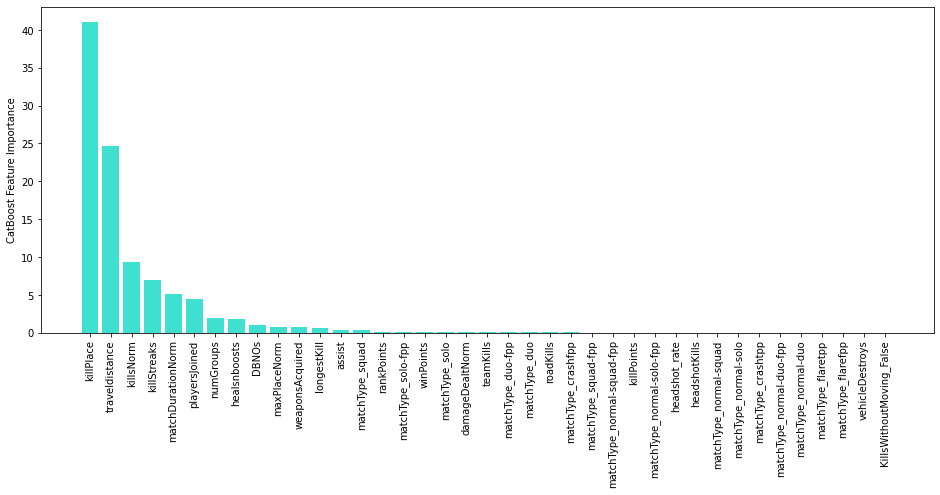

In [73]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

## Prediction

In [74]:
pred = model.predict(xtest)

In [75]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2FiN3V6czJmNzdncmVmb2U2YXRudDdkd2NodzllNGY1dnlsbHA3eiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/wOrKsd0Xre3zCQsFuV/giphy.gif"></center>